<a href="https://www.kaggle.com/code/yorkyong/defective-steel-plate-ensemble?scriptVersionId=166026942" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>1 |</span></b> <b>INTRODUCTION</b></div>

### <b><span style='color:#FFCE30'> 1.1 |</span> Objective</b>
- In this notebook we will perform some simple EDA to check the dataset
- Thereafter we will use a pipeline to perform the necessary data preprocessing
- We will then use permutation importance / SHAP Value / and feature importance to select key features to use for the model (we keep up to 15)
- Send the model through Ensemble Learning and submit the results

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>2 |</span></b> <b>LOAD DATA</b></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Set the display options to show all columns without truncation
pd.set_option('display.max_columns', None)

In [2]:
#Load the data
train = pd.read_csv("/kaggle/input/playground-series-s4e3/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s4e3/test.csv")
sample_submission = pd.read_csv('/kaggle/input/playground-series-s4e3/sample_submission.csv')

In [3]:
train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [4]:
test.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,127,1656,0,1,150,0.3877,0.4896,0.3273,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,19220,1257,1271,419960,419973,370,26,28,39293,92,132,1354,0,1,40,0.1629,0.4136,0.0938,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
2,19221,1358,1372,117715,117724,289,36,32,29386,101,134,1360,0,1,40,0.0609,0.6234,0.4762,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
3,19222,158,168,232415,232440,80,10,11,8586,107,140,1690,1,0,100,0.4439,0.3333,0.8182,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
4,19223,559,592,544375,544389,140,19,15,15524,103,134,1688,1,0,60,0.8191,0.2619,0.4286,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170


In [5]:
sample_submission.head()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,19220,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,19221,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,19222,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,19223,0.5,0.5,0.5,0.5,0.5,0.5,0.5


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>3 |</span></b> <b>EDA</b></div>
- No missing data in both train and test set
- No catgorical data
- Last 7 columns of train data are target variable to predict

### <b><span style='color:#FFCE30'> 3.1 |</span> Train data</b>

In [6]:
train.describe().T.style.background_gradient(cmap='Oranges').format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
id,19219.00,9609.00,5548.19,0.00,4804.50,9609.00,14413.50,19218.00
X_Minimum,19219.00,709.85,531.54,0.00,49.00,777.00,1152.00,1705.00
X_Maximum,19219.00,753.86,499.84,4.00,214.00,796.00,1165.00,1713.00
Y_Minimum,19219.00,1849756.04,1903553.85,6712.00,657468.00,1398169.00,2368032.00,12987661.00
Y_Maximum,19219.00,1846605.35,1896295.14,6724.00,657502.00,1398179.00,2362511.00,12987692.00
Pixels_Areas,19219.00,1683.99,3730.32,6.00,89.00,168.00,653.00,152655.00
X_Perimeter,19219.00,95.65,177.82,2.00,15.00,25.00,64.00,7553.00
Y_Perimeter,19219.00,64.12,101.05,1.00,14.00,23.00,61.00,903.00
Sum_of_Luminosity,19219.00,191846.68,442024.69,250.00,9848.00,18238.00,67978.00,11591414.00
Minimum_of_Luminosity,19219.00,84.81,28.80,0.00,70.00,90.00,105.00,196.00


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [8]:
cols = train.columns
cols

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

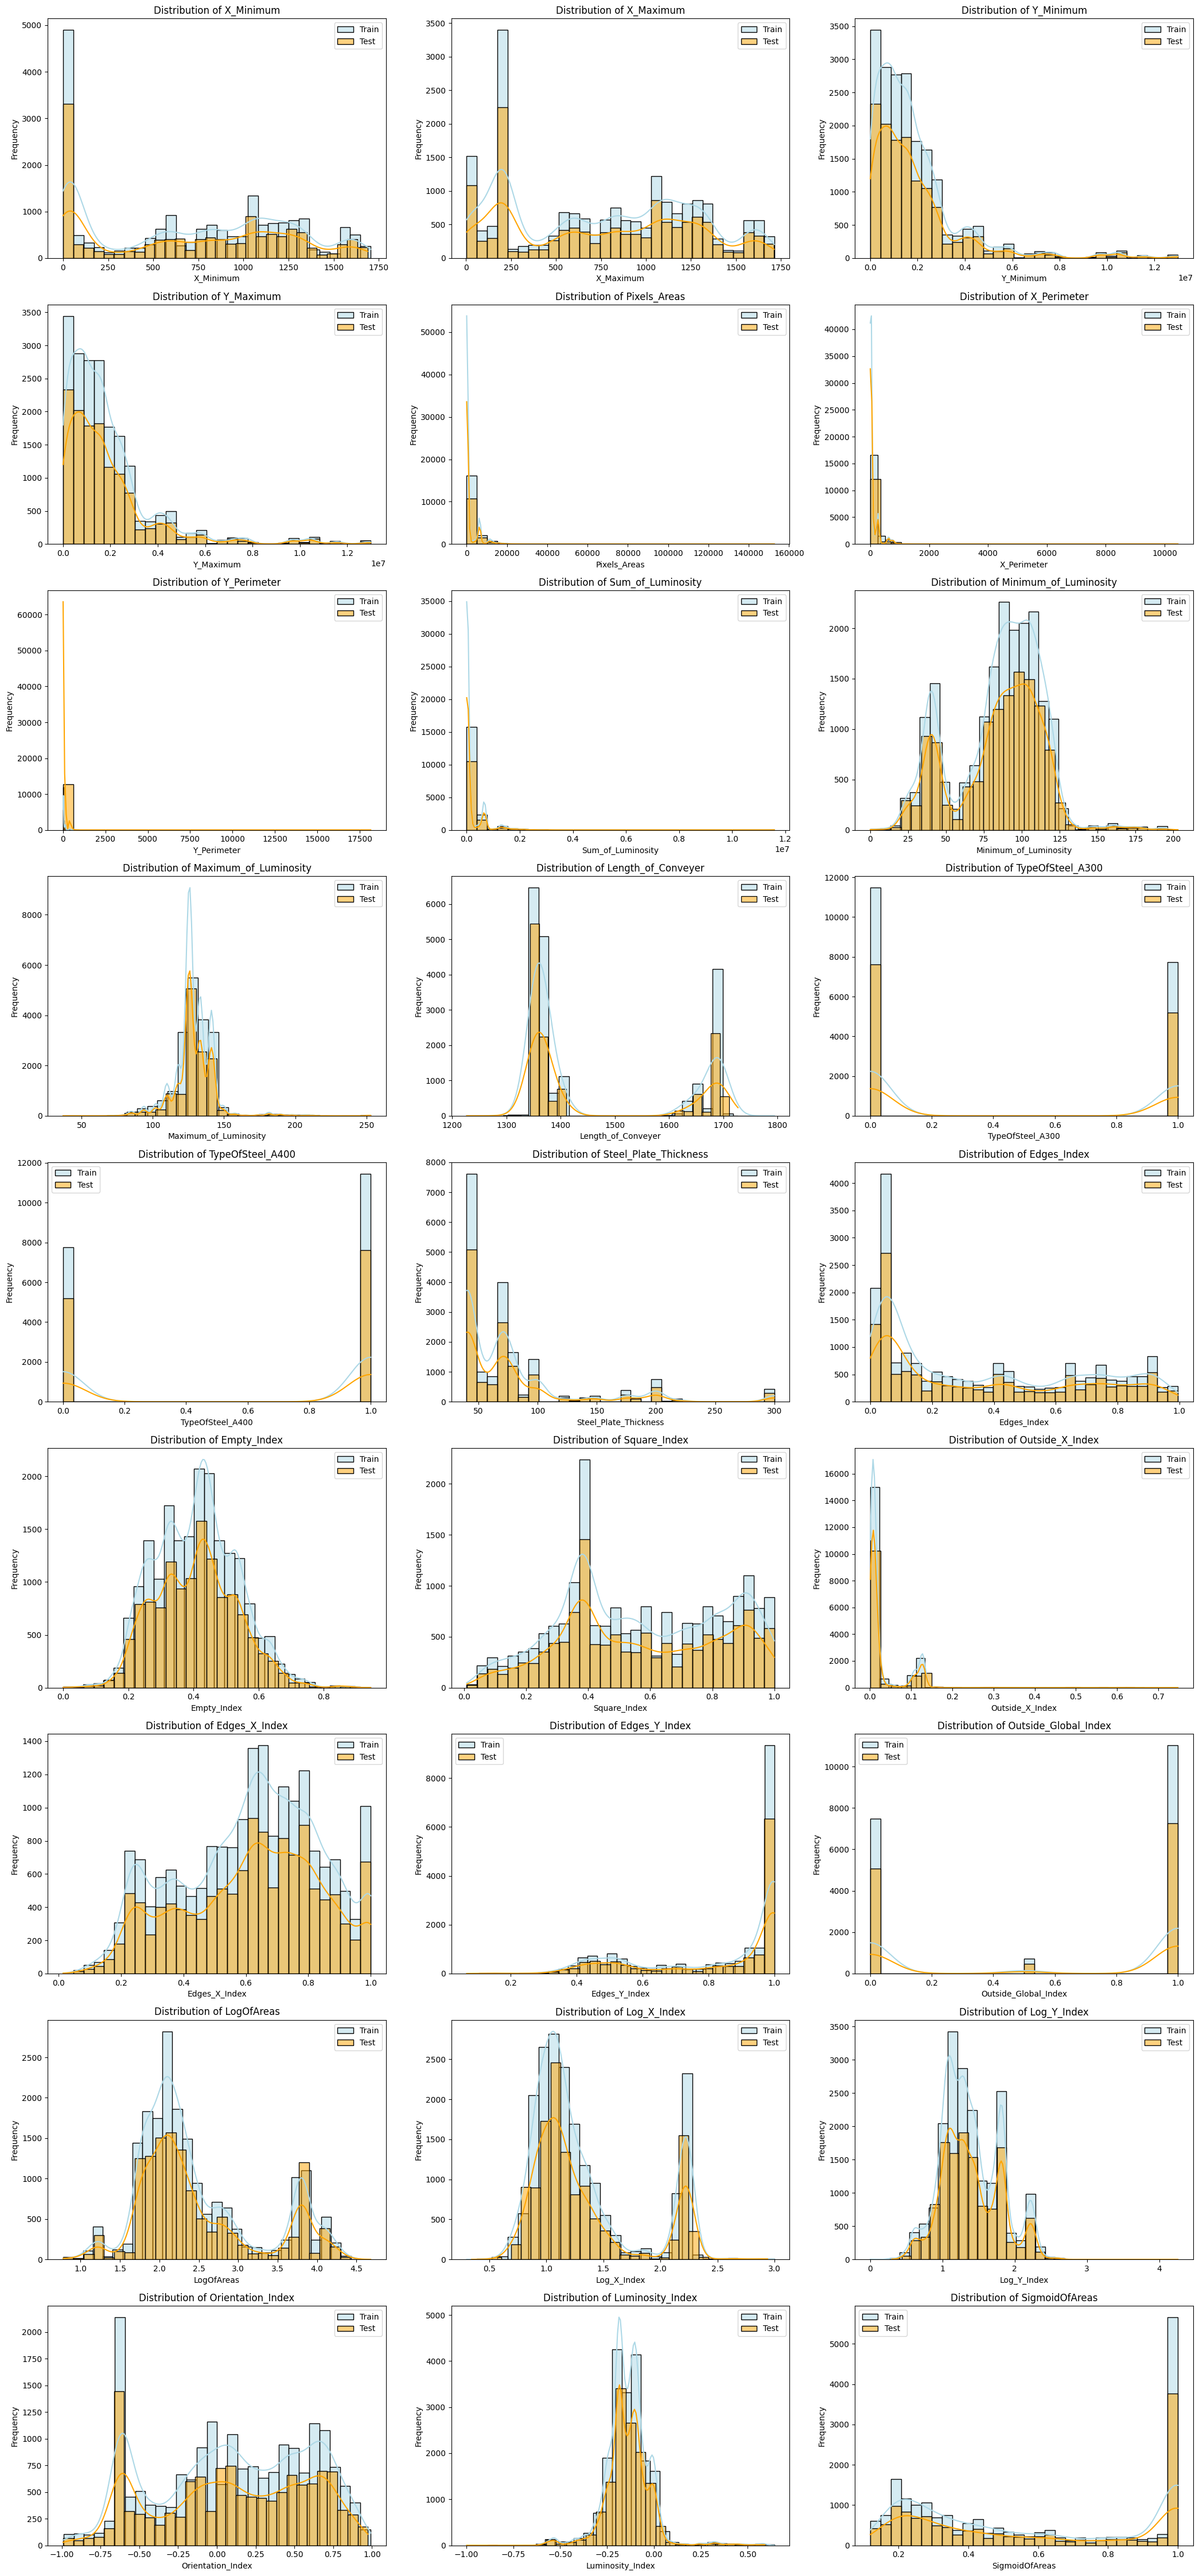

In [9]:
cols = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas']

colors = ['lightblue', 'orange']  

num_plots = len(cols)
num_cols = 3  
num_rows = -(-num_plots // num_cols)  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(21, 5 * num_rows))  # Adjust the figure size as needed

for i, feature in enumerate(cols):
    row = i // num_cols
    col = i % num_cols

    ax = axes[row, col] if num_rows > 1 else axes[col]
    
    sns.histplot(train[feature], kde=True, color=colors[0], label='Train', alpha=0.5, bins=30, ax=ax)
    sns.histplot(test[feature], kde=True, color=colors[1], label='Test', alpha=0.5, bins=30, ax=ax)
    
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend()

if num_plots % num_cols != 0:
    for j in range(num_plots % num_cols, num_cols):
        axes[-1, j].axis('off')

plt.tight_layout()
plt.show()

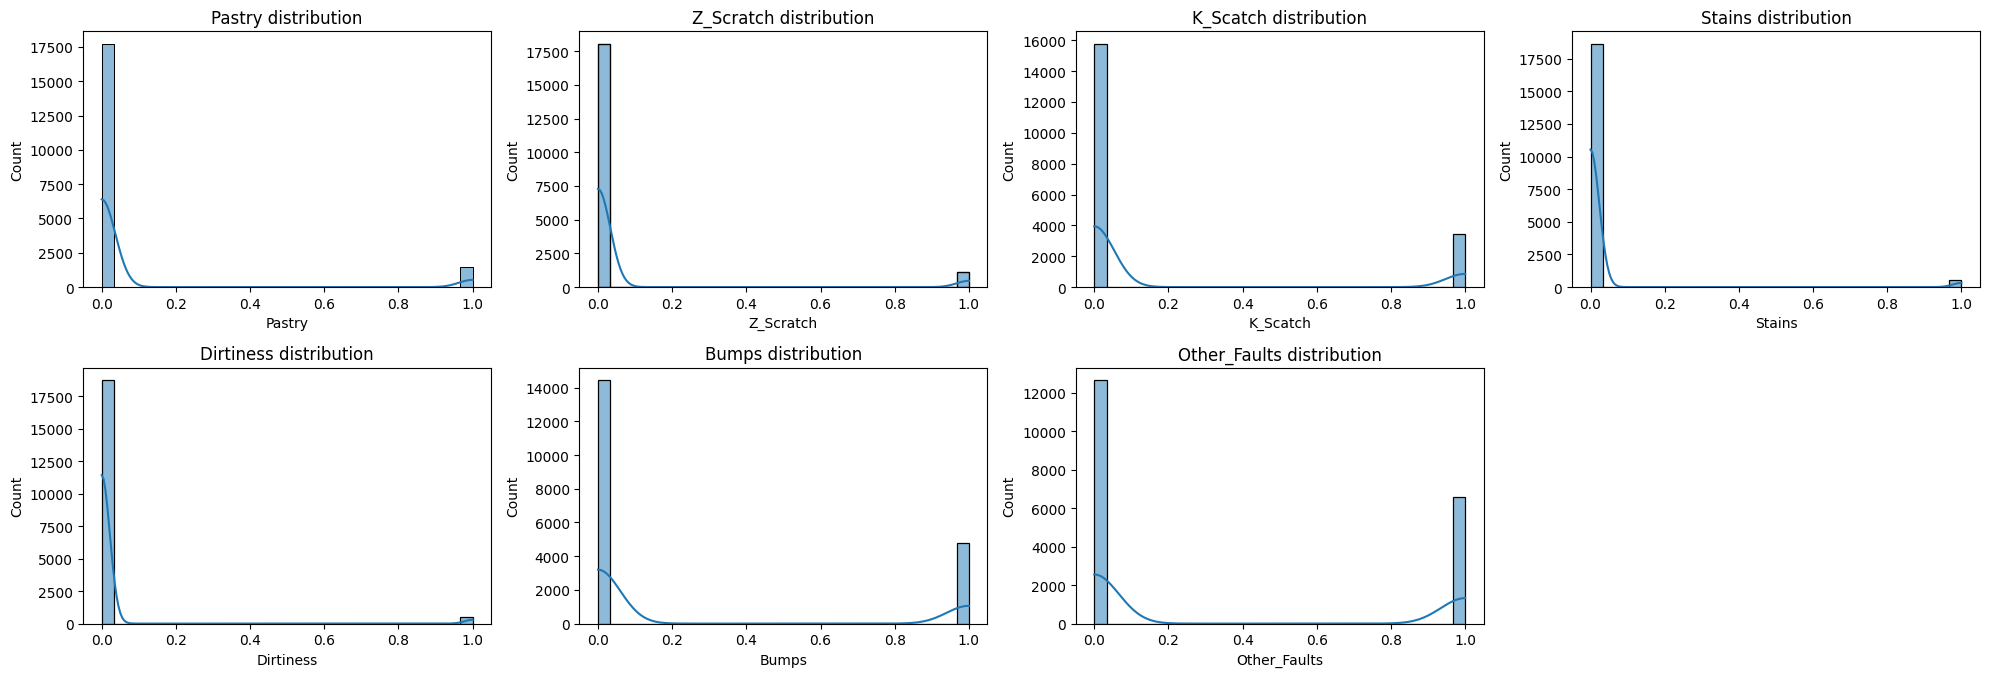

In [10]:
target_cols = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults']
plt.figure(figsize=(20,30))

for i, column in enumerate(target_cols):
    plt.subplot(9,4, i+1)
    sns.histplot(data=train, x=column, kde=True, bins=30)
    plt.title(f'{column} distribution')
    plt.tight_layout()

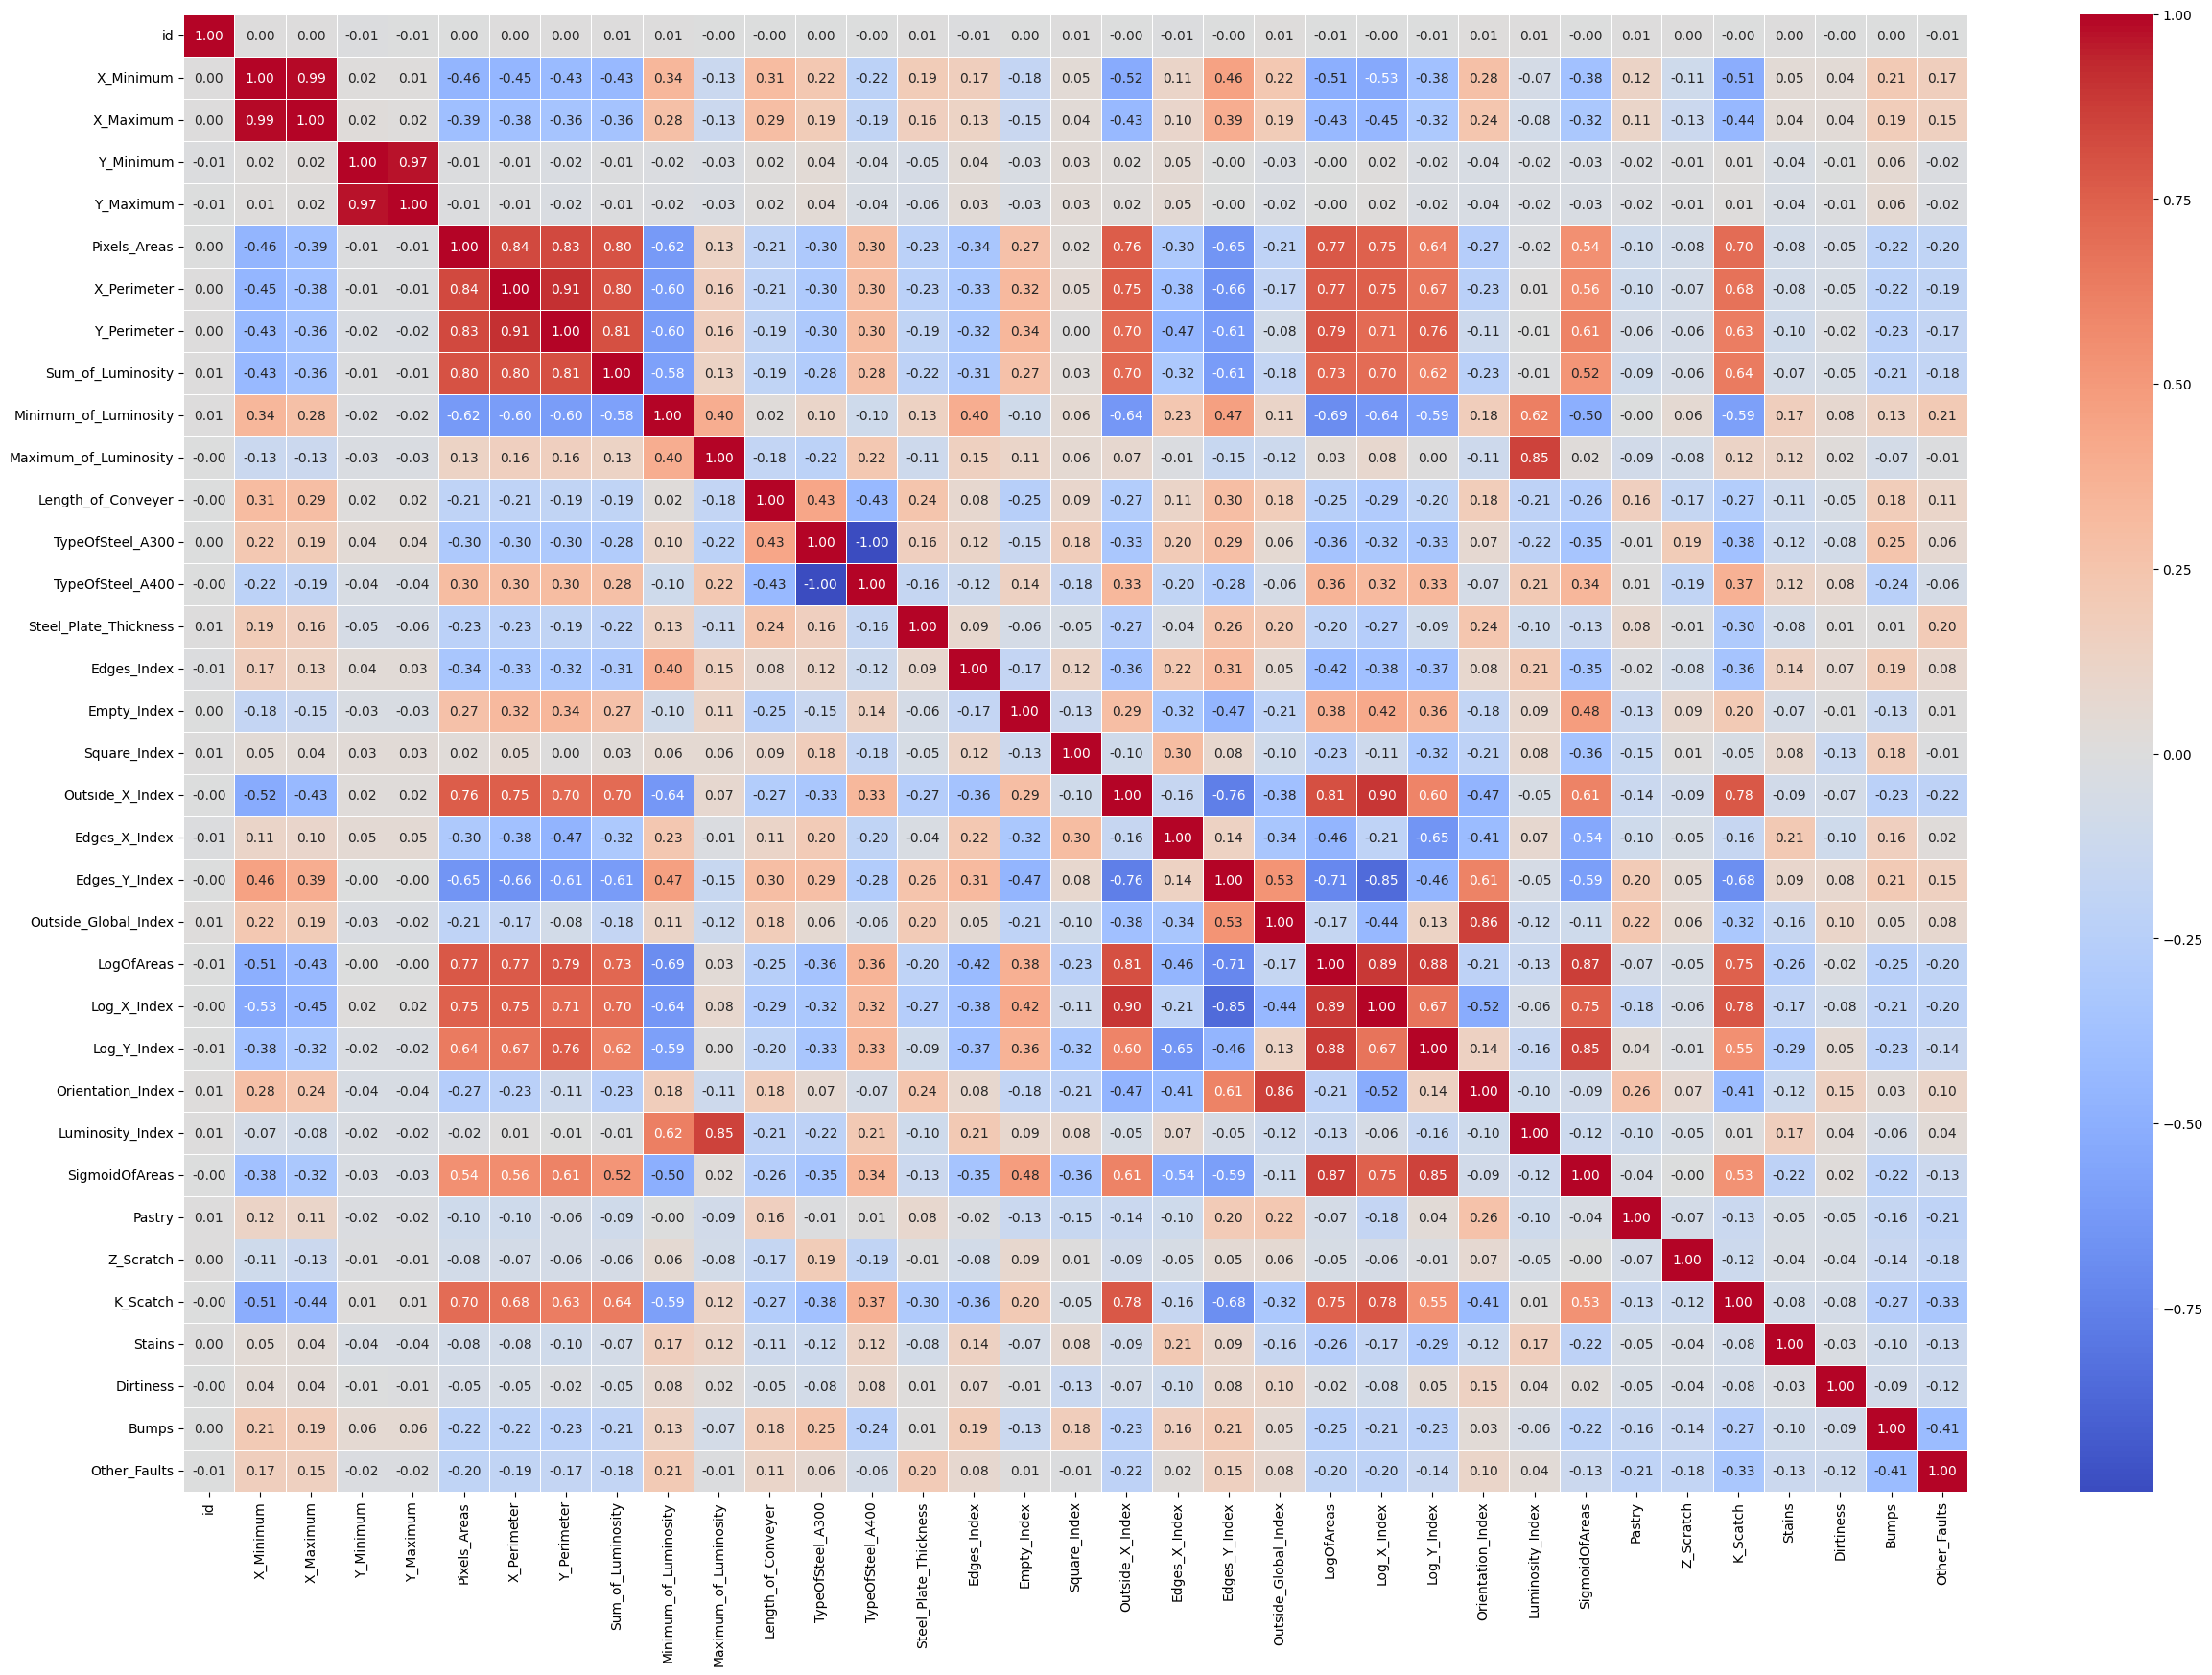

In [11]:
df_corr = train[train.columns].dropna().corr()
plt.figure(figsize=(30, 20))

# Plot the heatmap
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.show()

### <b><span style='color:#FFCE30'> 3.2 |</span> Test Data</b>

In [12]:
test.describe().T.style.background_gradient(cmap='Oranges').format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
id,12814.00,25625.50,3699.23,19219.00,22422.25,25625.50,28828.75,32032.00
X_Minimum,12814.00,709.33,531.88,0.00,46.00,776.00,1152.00,1688.00
X_Maximum,12814.00,753.27,500.74,4.00,214.00,796.00,1167.00,1712.00
Y_Minimum,12814.00,1846533.46,1916427.39,6712.00,640173.75,1378890.50,2368032.00,12987661.00
Y_Maximum,12814.00,1842029.49,1911425.61,6724.00,639857.00,1378588.00,2356237.50,12987692.00
Pixels_Areas,12814.00,1672.91,3725.52,4.00,91.00,169.00,649.00,152655.00
X_Perimeter,12814.00,96.46,219.93,2.00,15.00,24.00,64.00,10449.00
Y_Perimeter,12814.00,64.73,188.51,2.00,14.00,24.00,60.00,18152.00
Sum_of_Luminosity,12814.00,192689.30,481287.15,535.00,9968.00,18402.00,66960.25,11591414.00
Minimum_of_Luminosity,12814.00,84.55,28.71,0.00,68.00,90.00,105.00,203.00


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12814 entries, 0 to 12813
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     12814 non-null  int64  
 1   X_Minimum              12814 non-null  int64  
 2   X_Maximum              12814 non-null  int64  
 3   Y_Minimum              12814 non-null  int64  
 4   Y_Maximum              12814 non-null  int64  
 5   Pixels_Areas           12814 non-null  int64  
 6   X_Perimeter            12814 non-null  int64  
 7   Y_Perimeter            12814 non-null  int64  
 8   Sum_of_Luminosity      12814 non-null  int64  
 9   Minimum_of_Luminosity  12814 non-null  int64  
 10  Maximum_of_Luminosity  12814 non-null  int64  
 11  Length_of_Conveyer     12814 non-null  int64  
 12  TypeOfSteel_A300       12814 non-null  int64  
 13  TypeOfSteel_A400       12814 non-null  int64  
 14  Steel_Plate_Thickness  12814 non-null  int64  
 15  Ed

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>4 |</span></b> <b>DATA PREPROCESSING</b></div>

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

### <b><span style='color:#FFCE30'> 4.1 |</span> Drop Columns</b>

In [15]:
class DropColumn(BaseEstimator, TransformerMixin):
    def __init__(self, cols=[]):
        self.cols = cols
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):

        return X.drop(self.cols, axis=1)

DropColumn(cols=['id']).fit_transform(train)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,749,757,143210,143219,17,4,4,2193,122,140,1360,0,0,50,0.8950,0.1500,0.8571,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,723,735,2488529,2488541,231,17,26,27135,104,133,1652,1,0,70,0.9243,0.3254,0.2778,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,6,31,1578055,1578129,780,114,98,71112,41,94,1358,0,1,200,0.0148,0.4331,0.2281,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,9,18,1713172,1713184,126,13,26,14808,88,132,1692,1,0,60,0.0192,0.2361,0.0390,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1


### <b><span style='color:#FFCE30'> 4.2 |</span> Add Features</b>
- With reference from Ravi's notebook check it out here https://www.kaggle.com/code/ravi20076/playgrounds4e03-eda-binaryclassifier

In [16]:
class AddAdditionalFeatures(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed["XRange"] = X["X_Maximum"] - X["X_Minimum"]
        X_transformed["YRange"] = X["Y_Maximum"] - X["Y_Minimum"]
        X_transformed['Area_Perimeter_Ratio'] = X['Pixels_Areas'] / (X['X_Perimeter'] + X['Y_Perimeter'])
        X_transformed['Luminosity_Range'] = X['Maximum_of_Luminosity'] - X['Minimum_of_Luminosity']
        return X_transformed
    
AddAdditionalFeatures().fit_transform(train)    

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,XRange,YRange,Area_Perimeter_Ratio,Luminosity_Range
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0,6,5,1.230769,27
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1,8,22,5.851351,41
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0,153,68,10.122667,112
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0,8,27,4.666667,20
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1,20,45,3.748201,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,140,1360,0,0,50,0.8950,0.1500,0.8571,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0,8,9,2.125000,18
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,133,1652,1,0,70,0.9243,0.3254,0.2778,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1,12,12,5.372093,29
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,94,1358,0,1,200,0.0148,0.4331,0.2281,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0,25,74,3.679245,53
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,132,1692,1,0,60,0.0192,0.2361,0.0390,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1,9,12,3.230769,44


### <b><span style='color:#FFCE30'> 4.2 |</span> Add Aspect Ratio</b>
- With reference from Ravi's notebook check it out here https://www.kaggle.com/code/ravi20076/playgrounds4e03-eda-binaryclassifier

In [17]:
class AddAspectRatio(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed['Aspect_Ratio'] = np.where(X['YRange'] == 0, 0, X['XRange'] / X['YRange'])
        return X_transformed

df1 = AddAdditionalFeatures().fit_transform(train)
AddAspectRatio().fit_transform(df1)

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,XRange,YRange,Area_Perimeter_Ratio,Luminosity_Range,Aspect_Ratio
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0,6,5,1.230769,27,1.200000
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1,8,22,5.851351,41,0.363636
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0,153,68,10.122667,112,2.250000
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0,8,27,4.666667,20,0.296296
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1,20,45,3.748201,29,0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,140,1360,0,0,50,0.8950,0.1500,0.8571,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0,8,9,2.125000,18,0.888889
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,133,1652,1,0,70,0.9243,0.3254,0.2778,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1,12,12,5.372093,29,1.000000
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,94,1358,0,1,200,0.0148,0.4331,0.2281,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0,25,74,3.679245,53,0.337838
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,132,1692,1,0,60,0.0192,0.2361,0.0390,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1,9,12,3.230769,44,0.750000


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>5 |</span></b> <b>ASSEMBLING THE PIPELINE</b></div>

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline

In [19]:
named_preprocessing_pipeline = Pipeline([
        ('Addfeature', AddAdditionalFeatures()),
        ('AspectRatio', AddAspectRatio()),
    
        
        ('drop', DropColumn(cols=[
            'id', #id is not a useful feature
        ]
                           )
        ),
    
        ('prep', ColumnTransformer([
            ('encode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), 
             list(['TypeOfSteel_A300',"TypeOfSteel_A400"])),],
         remainder='passthrough').set_output(transform='pandas')
        ),
])

named_preprocessing_pipeline

Pipeline(steps=[('Addfeature', AddAdditionalFeatures()),
                ('AspectRatio', AddAspectRatio()),
                ('drop', DropColumn(cols=['id'])),
                ('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['TypeOfSteel_A300',
                                                   'TypeOfSteel_A400'])]))])

In [20]:
from sklearn.preprocessing import  StandardScaler,RobustScaler

# Using Standard Scaler or Robust Scaler to scale numeric variables

class StandardScalerNamed(StandardScaler, TransformerMixin):
    def get_feature_names_out(self, X, y=None):
        return X.columns.tolist()

    def transform(self, X, y=None):
        transformed = super().transform(X, y)
        return pd.DataFrame(transformed, columns=X.columns)


class RobustScalerNamed(RobustScaler, TransformerMixin):
    def get_feature_names_out(self, X, y=None):
        return X.columns.tolist()

    def transform(self, X, y=None):
        transformed = super().transform(X, y)
        return pd.DataFrame(transformed, columns=X.columns)

In [21]:
modelling_pipeline = Pipeline(named_preprocessing_pipeline.steps + [('scale',RobustScaler().set_output(transform='pandas')),])
modelling_pipeline

Pipeline(steps=[('Addfeature', AddAdditionalFeatures()),
                ('AspectRatio', AddAspectRatio()),
                ('drop', DropColumn(cols=['id'])),
                ('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['TypeOfSteel_A300',
                                                   'TypeOfSteel_A400'])])),
                ('scale', RobustScaler())])

In [22]:
label_cols = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

In [23]:
# drop observations with multiple labels
train = train[train[label_cols].sum(axis=1) <= 1]

In [24]:
# add a label column for the multi-class classification 
sparse_labels = train[label_cols].values.copy()
sparse_labels = np.concatenate([sparse_labels, 1 - sparse_labels.sum(1)[:, np.newaxis]], axis=1)
train['label'] = np.argmax(sparse_labels, axis=1)

In [25]:
X = train.drop(columns=label_cols + ['label'])
y = train['label'].values

In [26]:
#checking output on train df
df_train = modelling_pipeline.fit_transform(X)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19198 entries, 0 to 19218
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   encode__TypeOfSteel_A300          19198 non-null  float64
 1   encode__TypeOfSteel_A400          19198 non-null  float64
 2   remainder__X_Minimum              19198 non-null  float64
 3   remainder__X_Maximum              19198 non-null  float64
 4   remainder__Y_Minimum              19198 non-null  float64
 5   remainder__Y_Maximum              19198 non-null  float64
 6   remainder__Pixels_Areas           19198 non-null  float64
 7   remainder__X_Perimeter            19198 non-null  float64
 8   remainder__Y_Perimeter            19198 non-null  float64
 9   remainder__Sum_of_Luminosity      19198 non-null  float64
 10  remainder__Minimum_of_Luminosity  19198 non-null  float64
 11  remainder__Maximum_of_Luminosity  19198 non-null  float64
 12  remainder

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>6 |</span></b> <b>ENSEMBLE</b></div>

In [27]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.base import ClassifierMixin

2024-03-08 13:58:19.584051: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-08 13:58:19.584154: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-08 13:58:19.704422: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [28]:
# XGBoost baseline model
xgb_model = XGBClassifier(
                          objective='multi:softprob',
                          eval_metric='mlogloss',
                          )

xgb_pipeline = make_pipeline(modelling_pipeline, xgb_model)


# LightGBM baseline model
lgbm_model = LGBMClassifier(
    objective='multiclass',  # Multiclass classification
    metric='multi_logloss',  # Use multi_logloss for multiclass log loss optimization
    n_jobs=-1,  # Use all available cores
    verbosity=-1
)

# Create a pipeline with preprocessing and LightGBM model
lgbm_pipeline = make_pipeline(modelling_pipeline, lgbm_model)


# CatBoost baseline model
catboost_model = CatBoostClassifier(
    loss_function='MultiClass',  # Multiclass classification
    task_type='CPU',  # Use CPU for training
    verbose=0  # Set verbosity to 0 for less output
)

# Create a pipeline with preprocessing and CatBoost model
cb_pipeline = make_pipeline(modelling_pipeline, catboost_model)


# Logistic Regression baseline model
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Create a pipeline with preprocessing and Logistic Regression  model
lr_pipeline = make_pipeline(modelling_pipeline, logistic_model)


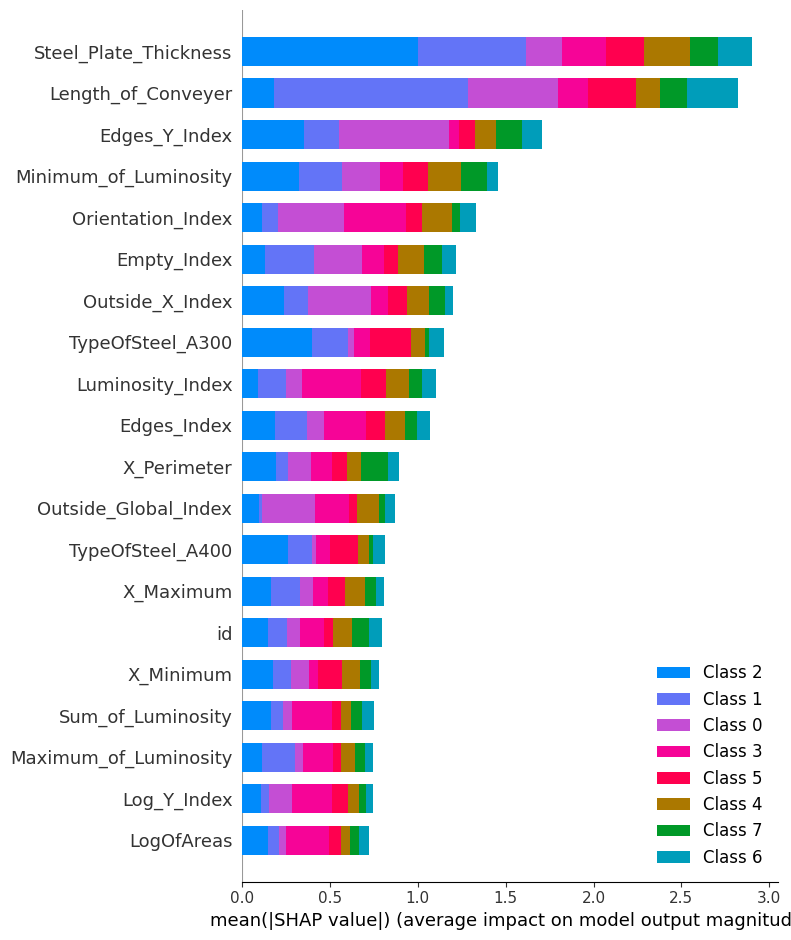

In [29]:
from sklearn.model_selection import train_test_split

import shap

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming xgb_pipeline is a Pipeline with lgbm as its last step
cb_model = cb_pipeline.steps[-1][1]

my_model = cb_model.fit(X_train,y_train)

explainer = shap.TreeExplainer(my_model)
shap_values = explainer.shap_values(X_val)

shap.summary_plot(shap_values, X_val)

In [30]:
# Create an empty DataFrame to store SHAP values
shap_df = pd.DataFrame()

# Iterate over each class
for class_index in range(7):  # Assuming you have 7 classes
    # Create a DataFrame for SHAP values of the current class
    class_shap_df = pd.DataFrame(data=shap_values[class_index], columns=X.columns)
    # Append the DataFrame to the shap_df DataFrame|
    shap_df = pd.concat([shap_df, class_shap_df], ignore_index=True)

features = list(X.columns)    
shap_ranking = [features[index] for index in shap_df.abs().mean().argsort()[::-1]]    

shap_ranking

['Steel_Plate_Thickness',
 'Length_of_Conveyer',
 'Edges_Y_Index',
 'Minimum_of_Luminosity',
 'Orientation_Index',
 'TypeOfSteel_A300',
 'Empty_Index',
 'Outside_X_Index',
 'Luminosity_Index',
 'Edges_Index',
 'Outside_Global_Index',
 'TypeOfSteel_A400',
 'X_Maximum',
 'X_Perimeter',
 'X_Minimum',
 'Log_Y_Index',
 'id',
 'Sum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Pixels_Areas',
 'LogOfAreas',
 'Edges_X_Index',
 'Y_Perimeter',
 'Log_X_Index',
 'Square_Index',
 'SigmoidOfAreas',
 'Y_Minimum',
 'Y_Maximum']

In [31]:
# Define the list of selected columns you want to keep
selected_columns = [
 'Steel_Plate_Thickness',
 'Length_of_Conveyer',
 'Edges_Y_Index',
 'Minimum_of_Luminosity',
 'Orientation_Index',
 'TypeOfSteel_A300',
 'Empty_Index',
 'Outside_X_Index',
 'Luminosity_Index',
 'Edges_Index',
 'Outside_Global_Index',
 'TypeOfSteel_A400',
 'X_Maximum',
 'X_Perimeter',
 'X_Minimum',
 'Log_Y_Index',
 'Sum_of_Luminosity',
 'Maximum_of_Luminosity',
 'Pixels_Areas',
 'LogOfAreas',
 'id',   
    
 'Y_Perimeter',   
 'Y_Minimum',
 'Y_Maximum'   
] 

# Select only the desired columns from the DataFrame
X_cb = X[selected_columns]
X_cb

,Steel_Plate_Thickness,Length_of_Conveyer,Edges_Y_Index,Minimum_of_Luminosity,Orientation_Index,TypeOfSteel_A300,Empty_Index,Outside_X_Index,Luminosity_Index,Edges_Index,Outside_Global_Index,TypeOfSteel_A400,X_Maximum,X_Perimeter,X_Minimum,Log_Y_Index,Sum_of_Luminosity,Maximum_of_Luminosity,Pixels_Areas,LogOfAreas,id,Y_Perimeter,Y_Minimum,Y_Maximum
0,50,1358,1.0000,113,-0.5000,0,0.4000,0.0059,-0.0104,0.7393,0.0,1,590,8,584,0.6990,2274,140,16,1.2041,0,5,909972,909977
1,80,1687,1.0000,70,0.7419,1,0.2878,0.0044,-0.2997,0.7772,1.0,0,816,20,808,1.7324,44478,111,433,2.6365,1,54,728350,728372
2,40,1400,0.3857,29,-0.0105,0,0.5282,0.1077,-0.0944,0.0557,0.0,1,192,705,39,2.2095,1311391,141,11388,4.0564,2,420,2212076,2212144
3,40,1387,0.9310,114,0.6667,0,0.3333,0.0044,-0.0402,0.7202,1.0,1,789,16,781,1.4314,3202,134,210,2.3222,3,29,3353146,3353173
4,300,1692,0.9861,82,0.9158,0,0.5347,0.0192,-0.2455,0.1211,1.0,1,1560,72,1540,1.8808,48231,111,521,2.7694,4,67,618457,618502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,50,1360,0.8000,122,-0.1429,0,0.1500,0.0044,0.0044,0.8950,0.0,0,757,4,749,0.6021,2193,140,17,1.2305,19214,4,143210,143219
19215,70,1652,0.9216,104,0.7222,1,0.3254,0.0065,-0.0989,0.9243,1.0,0,735,17,723,1.4150,27135,133,231,2.3636,19215,26,2488529,2488541
19216,200,1358,0.9554,41,0.7719,0,0.4331,0.0199,-0.4283,0.0148,1.0,1,31,114,6,1.8692,71112,94,780,2.8921,19216,98,1578055,1578129
19217,60,1692,1.0000,88,0.9610,1,0.2361,0.0068,-0.1162,0.0192,1.0,0,18,13,9,1.4150,14808,132,126,2.1004,19217,26,1713172,1713184


In [32]:
# class TensorFlower(BaseEstimator, ClassifierMixin):
#     def __init__(self, epochs=100, 
#                  batch_size=32, 
#                  patience=5, 
#                  min_delta=0.0001):
#         self.epochs = epochs
#         self.batch_size = batch_size
#         self.patience = patience
#         self.min_delta = min_delta
#         self.history = None  # To store the training history
        
#     def fit(self, x, y, validation_data=None):
#         input_shape = df_train.shape[1]  # Assuming the input shape is the number of features
#         inputs = tf.keras.Input(shape=(input_shape,))
#         inputs_norm = tf.keras.layers.BatchNormalization()(inputs)  # Normalizing the input

#         z = tf.keras.layers.Dense(256)(inputs_norm)
#         z = tf.keras.layers.ReLU()(z)
#         z = tf.keras.layers.BatchNormalization()(z)

#         z = tf.keras.layers.Dense(256)(z)
#         z = tf.keras.layers.ReLU()(z)
#         z = tf.keras.layers.BatchNormalization()(z)
        
#         z = tf.keras.layers.Dense(128)(z)
#         z = tf.keras.layers.ReLU()(z)
#         z = tf.keras.layers.BatchNormalization()(z)

#         z = tf.keras.layers.Dense(8)(z)  # 8 classes
#         z = tf.keras.layers.BatchNormalization()(z)
#         outputs = tf.keras.activations.softmax(z)  # Softmax activation for multi-class classification

#         self.model = tf.keras.Model(inputs, outputs)
#         self.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.AdamW(1e-4), metrics=['accuracy'])

#         # Early Stopping Callback
#         early_stopping = tf.keras.callbacks.EarlyStopping(
#             patience=self.patience,
#             min_delta=self.min_delta,
#             restore_best_weights=True
#         )

#         # Convert target values to one-hot encoding if not already
#         if len(y.shape) == 1:  # Assuming y is not one-hot encoded
#             y = tf.keras.utils.to_categorical(y)

#         # Fit the model with or without validation data
#         if validation_data is None:
#             self.history = self.model.fit(x, y,
#                                        epochs=self.epochs, batch_size=self.batch_size,
#                                        verbose=1, callbacks=[early_stopping])
#         else:
#             X_val, y_val = validation_data
#             if len(y_val.shape) == 1:  # Assuming y_val is not one-hot encoded
#                 y_val = tf.keras.utils.to_categorical(y_val)
#             self.history = self.model.fit(x, y,
#                                        epochs=self.epochs, batch_size=self.batch_size,
#                                        verbose=1, callbacks=[early_stopping],
#                                        validation_data=(X_val, y_val))
#         self.classes_ = np.unique(y)
        
#         return self

    
#     def predict_proba(self, x):
#         return self.model.predict(x, verbose=0)

#     def predict(self, x):
#         return np.argmax(self.predict_proba(x), axis=1)


In [33]:
# TF_pipeline = make_pipeline(modelling_pipeline, TensorFlower())

# TF_pipeline

In [34]:
# from sklearn.model_selection import train_test_split

# # Split your data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


# # Fit the preprocessing pipeline to the training data and transform both training and validation data
# X_train_processed = modelling_pipeline.fit_transform(X_train)
# X_val_processed = modelling_pipeline.transform(X_val)

# # Create an instance of your TensorFlow model
# flower_model = TensorFlower()

# # Fit the model to the training data with validation data
# flower_model.fit(X_train_processed, y_train, validation_data=(X_val_processed, y_val))



In [35]:
from sklearn.ensemble import VotingClassifier

In [36]:
ensemble_model = VotingClassifier(estimators=[
    ('xgb', xgb_pipeline),
    ('lgb', lgbm_pipeline),
    ('cb', cb_pipeline),
    ('lr', lr_pipeline),
    #('tf', TF_pipeline),
            
]
                                  , voting='soft',
                                  weights = [0.21,0.21,0.37,0.21]) 

ensemble_model

VotingClassifier(estimators=[('xgb',
                              Pipeline(steps=[('pipeline',
                                               Pipeline(steps=[('Addfeature',
                                                                AddAdditionalFeatures()),
                                                               ('AspectRatio',
                                                                AddAspectRatio()),
                                                               ('drop',
                                                                DropColumn(cols=['id'])),
                                                               ('prep',
                                                                ColumnTransformer(remainder='passthrough',
                                                                                  transformers=[('encode',
                                                                                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                                unknown_value=-1),
                                                                                                 ['TypeOfSteel_A300',
                                                                                                  'Ty...
                                                                DropColumn(cols=['id'])),
                                                               ('prep',
                                                                ColumnTransformer(remainder='passthrough',
                                                                                  transformers=[('encode',
                                                                                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                                unknown_value=-1),
                                                                                                 ['TypeOfSteel_A300',
                                                                                                  'TypeOfSteel_A400'])])),
                                                               ('scale',
                                                                RobustScaler())])),
                                              ('logisticregression',
                                               LogisticRegression(multi_class='multinomial'))]))],
                 voting='soft', weights=[0.21, 0.21, 0.37, 0.21])

In [37]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import f1_score, roc_auc_score

# Number of folds
n_splits = 10

# Adjusting parameters of StratifiedKFold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Cross-validation results
cv_results = []

# Stratified k-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(stratkf.split(X_cb, y)):
    X_train, X_val = X_cb.iloc[train_idx], X_cb.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    
    # Fit the model
    ensemble_model.fit(X_train, y_train)

    # Predictions on the validation set
    y_val_pred_prob = ensemble_model.predict_proba(X_val)
    y_pred = ensemble_model.predict(X_val)
        
    # Calculate evaluation metrics
    f1 = f1_score(y_val, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_val, y_val_pred_prob, multi_class='ovr')

    print(f'Fold {fold + 1}, AUC Score on Validation Set: {roc_auc}')
    print(f'Fold {fold + 1}, F1 Score on Validation Set: {f1}')
    print('-' * 70)

    # Results
    cv_results.append(roc_auc)

# Average cross-validation result
average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage AUC-score across {n_splits} folds: {average_cv_result}')


Fold 1, AUC Score on Validation Set: 0.849812354774168
Fold 1, F1 Score on Validation Set: 0.5485108574664407
----------------------------------------------------------------------
Fold 2, AUC Score on Validation Set: 0.8524459120159883
Fold 2, F1 Score on Validation Set: 0.5614304260005312
----------------------------------------------------------------------
Fold 3, AUC Score on Validation Set: 0.8675412948570891
Fold 3, F1 Score on Validation Set: 0.5736320134850342
----------------------------------------------------------------------
Fold 4, AUC Score on Validation Set: 0.848101870633001
Fold 4, F1 Score on Validation Set: 0.5603347251588542
----------------------------------------------------------------------
Fold 5, AUC Score on Validation Set: 0.8587395498927457
Fold 5, F1 Score on Validation Set: 0.5448970404329977
----------------------------------------------------------------------
Fold 6, AUC Score on Validation Set: 0.8493376708951537
Fold 6, F1 Score on Validation Set: 

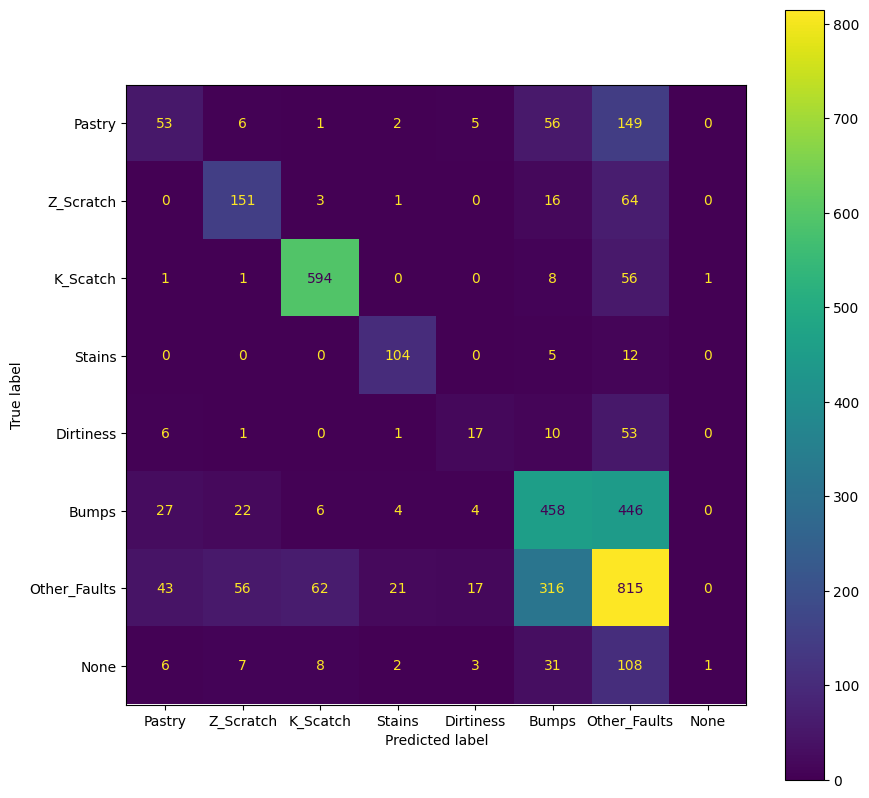

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import  confusion_matrix

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

ensemble_model.fit(X_train,y_train)

predictions = ensemble_model.predict(X_val)

cm = confusion_matrix(y_val, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults','None'])

plt.figure(figsize=(10, 10))

# Plot the confusion matrix
disp.plot(ax=plt.gca())  # Use the current axes
plt.show()

- Seems to have difficulty to seperate 'Other_Faults' and 'Bumps' properly

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#FFCE30"><b><span style='color:#FFFFFF'>7 |</span></b> <b>SUBMISSION</b></div>

In [39]:
# Fit the xgb model model
ensemble_model.fit(X, y)

# Create submission file with probability predictions
predictions = ensemble_model.predict_proba(test)[:, :-1]

sample_submission[label_cols] = predictions
sample_submission.to_csv('submission_baseline_ensemble.csv', index=False)

In [40]:
sample_submission

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.557235,0.016769,0.029215,0.010857,0.029344,0.085787,0.236256
1,19220,0.234587,0.036504,0.030755,0.021913,0.174913,0.192564,0.270052
2,19221,0.020793,0.033031,0.070130,0.022940,0.024045,0.295055,0.431157
3,19222,0.135398,0.022964,0.014292,0.025460,0.025827,0.380132,0.347481
4,19223,0.017040,0.018077,0.026627,0.017911,0.017138,0.568302,0.300773
...,...,...,...,...,...,...,...,...
12809,32028,0.095922,0.070098,0.027416,0.019543,0.045613,0.240599,0.374021
12810,32029,0.096551,0.024725,0.026890,0.033947,0.100322,0.278041,0.391168
12811,32030,0.000072,0.000150,0.904055,0.000003,0.000106,0.000226,0.077875
12812,32031,0.326308,0.030591,0.038075,0.019875,0.049538,0.159701,0.330022


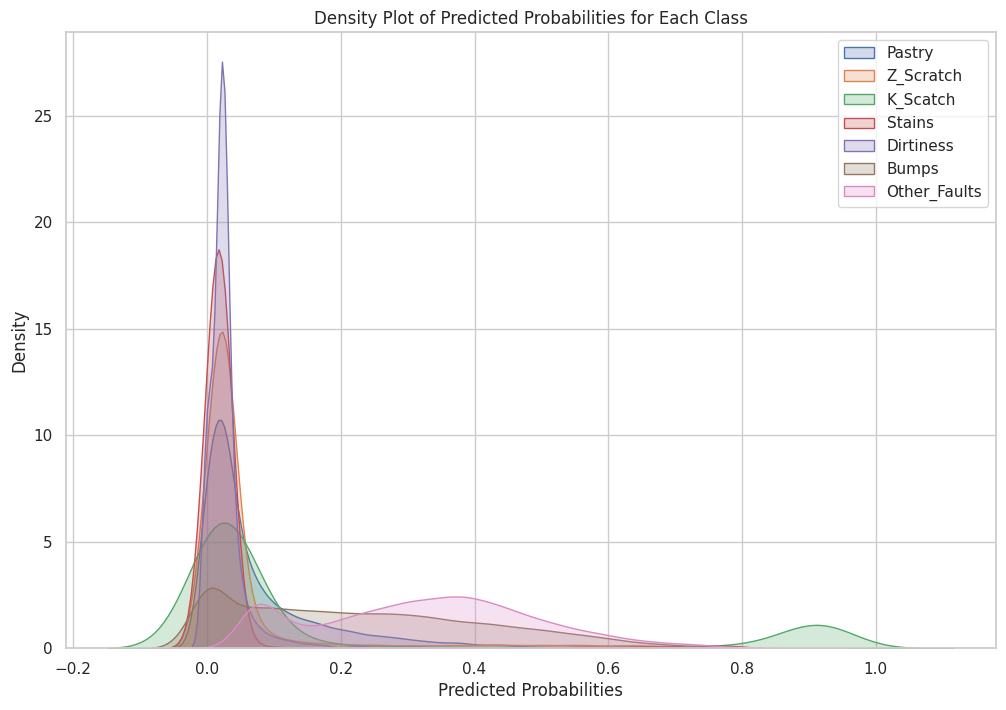

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Specify the columns you want to plot (excluding the 'id' column)
columns_to_plot = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

# Plot density plot for each category
plt.figure(figsize=(12, 8))
for column in columns_to_plot:
    sns.kdeplot(data=sample_submission[column], label=column, fill=True)
    
plt.title('Density Plot of Predicted Probabilities for Each Class')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Density')
plt.legend()
plt.show()